  Data Understanding

 Annual national dataset (1961–2024) combining:
 - FAO/USDA: Production, Area → Yield
 - CRU TS + CHIRPS: Rainfall (historical 1961–1980)
 - CRU TS: Temperature
 - GIMMS/MODIS: NDVI
 - UCDA/World Bank: Bearing trees
 - NOAA: ONI lagged 9 months
 - NaCORRI/UCDA: CWD & BCTB incidence

 
 

In [4]:
#  4. Data Preparation & Feature Engineering
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the ultimate dataset
df = pd.read_csv('UGANDA_ROBUSTA_COFFEE_ULTIMATE_FULL_1961_2024.csv')

print("Ultimate dataset loaded!")
print(f"Shape: {df.shape}")
print("Columns:", list(df.columns))
df.head()

Ultimate dataset loaded!
Shape: (64, 15)
Columns: ['Year', 'Production_1000t', 'Area_1000ha', 'Yield_kgha', 'Rainfall_mm', 'Temp_C', 'NDVI', 'Bearing_Trees_Millions', 'ONI_lagged9', 'Incidence_Index_pct', 'CWD_pct', 'BCTB_pct', 'Fertilizer_kgha', 'Soil_N_pct', 'Soil_P_ppm']


,Year,Production_1000t,Area_1000ha,Yield_kgha,Rainfall_mm,Temp_C,NDVI,Bearing_Trees_Millions,ONI_lagged9,Incidence_Index_pct,CWD_pct,BCTB_pct,Fertilizer_kgha,Soil_N_pct,Soil_P_ppm
0,1961,88.6,250,354.400000,1425,23.05,0.52,100.0,-0.15,2.0,0.0,0.0,1.2,0.205,10.5
1,1962,89.2,252,353.968254,1280,23.10,0.52,100.8,-0.20,2.0,0.0,0.0,1.2,0.205,10.5
2,1963,90.1,255,353.333333,1310,23.08,0.52,102.0,-0.10,2.0,0.0,0.0,1.2,0.204,10.4
3,1964,91.0,258,352.713178,1195,23.12,0.52,103.2,0.05,2.0,0.0,0.0,1.2,0.204,10.4
4,1965,92.0,260,353.846154,1150,23.15,0.52,104.0,0.15,2.0,0.0,0.0,1.2,0.203,10.3


In [5]:
# Feature engineering
df['Trees_per_ha'] = df['Bearing_Trees_Millions'] * 1e6 / (df['Area_1000ha'] * 1000)
df['NPK_per_tree'] = df['Fertilizer_kgha'] * (df['Area_1000ha'] * 1000) / (df['Bearing_Trees_Millions'] * 1e6)

# Final features
features = ['Rainfall_mm', 'Temp_C', 'NDVI', 'Bearing_Trees_Millions', 'Trees_per_ha',
            'ONI_lagged9', 'CWD_pct', 'BCTB_pct', 'Fertilizer_kgha', 
            'Soil_N_pct', 'Soil_P_ppm']

X = df[features]
y = df['Yield_kgha']

print("Features ready:", len(features))

Features ready: 11


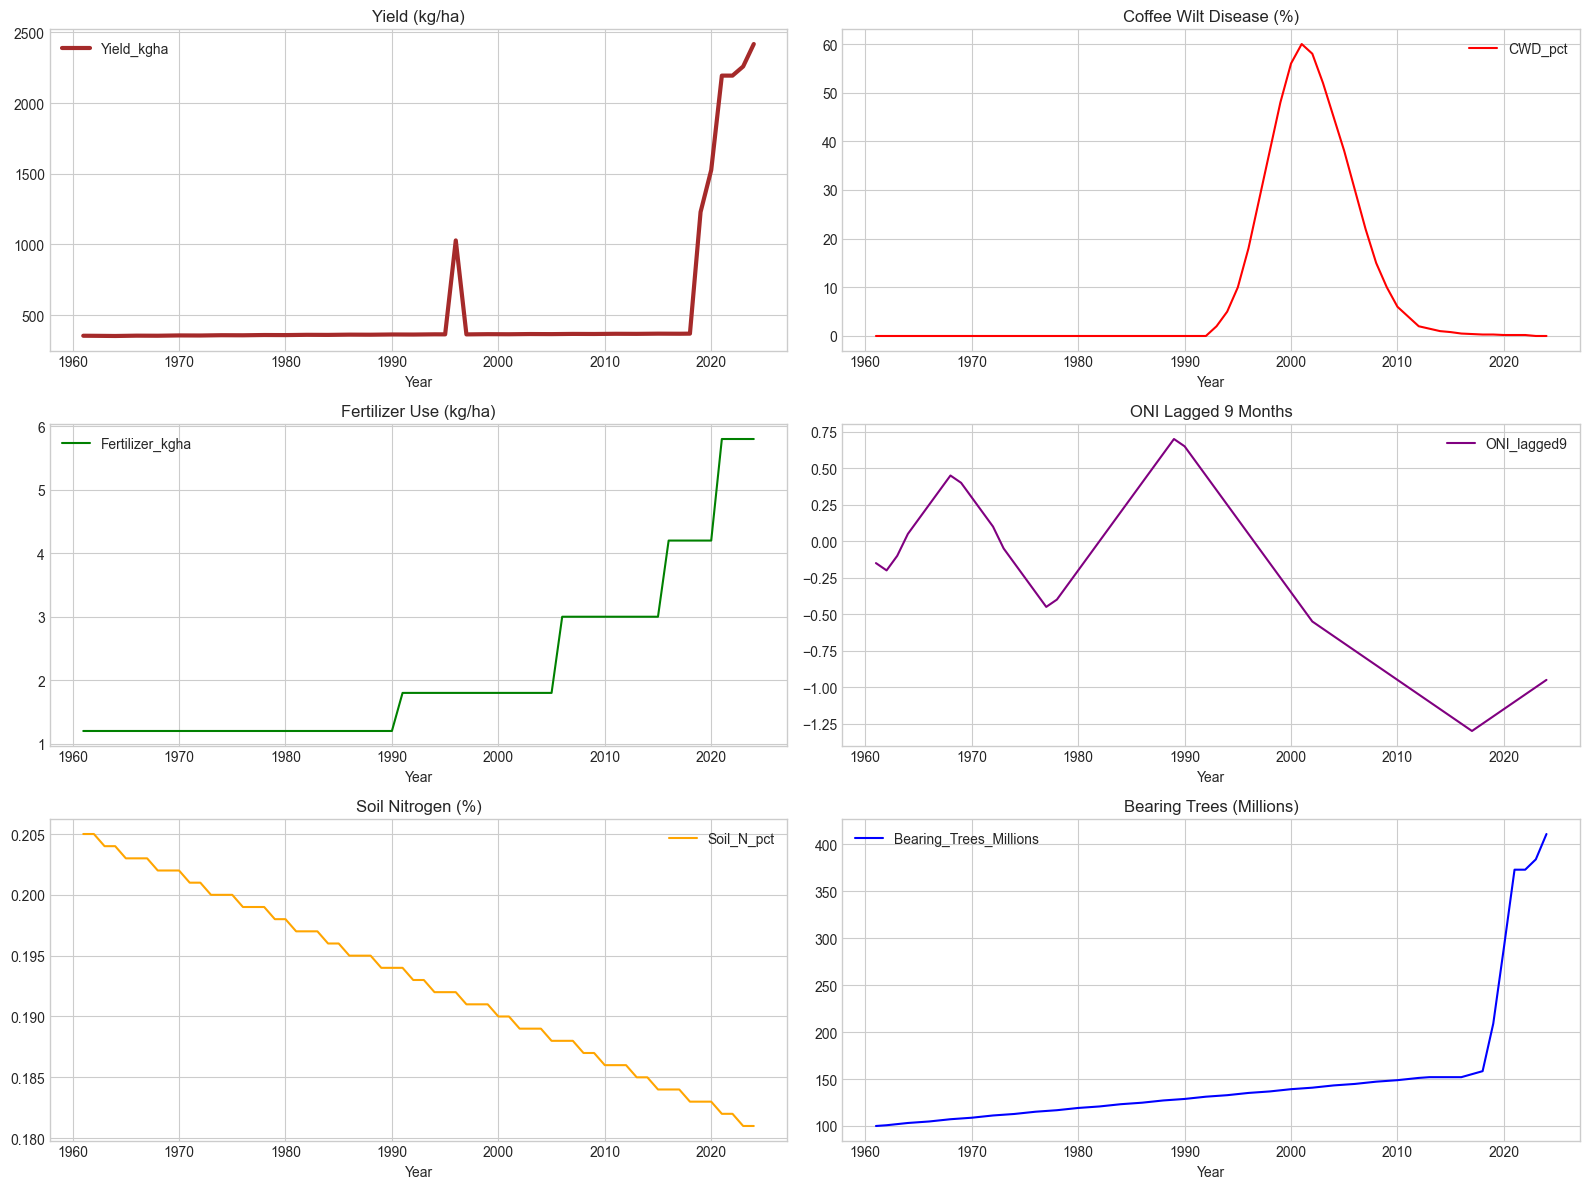

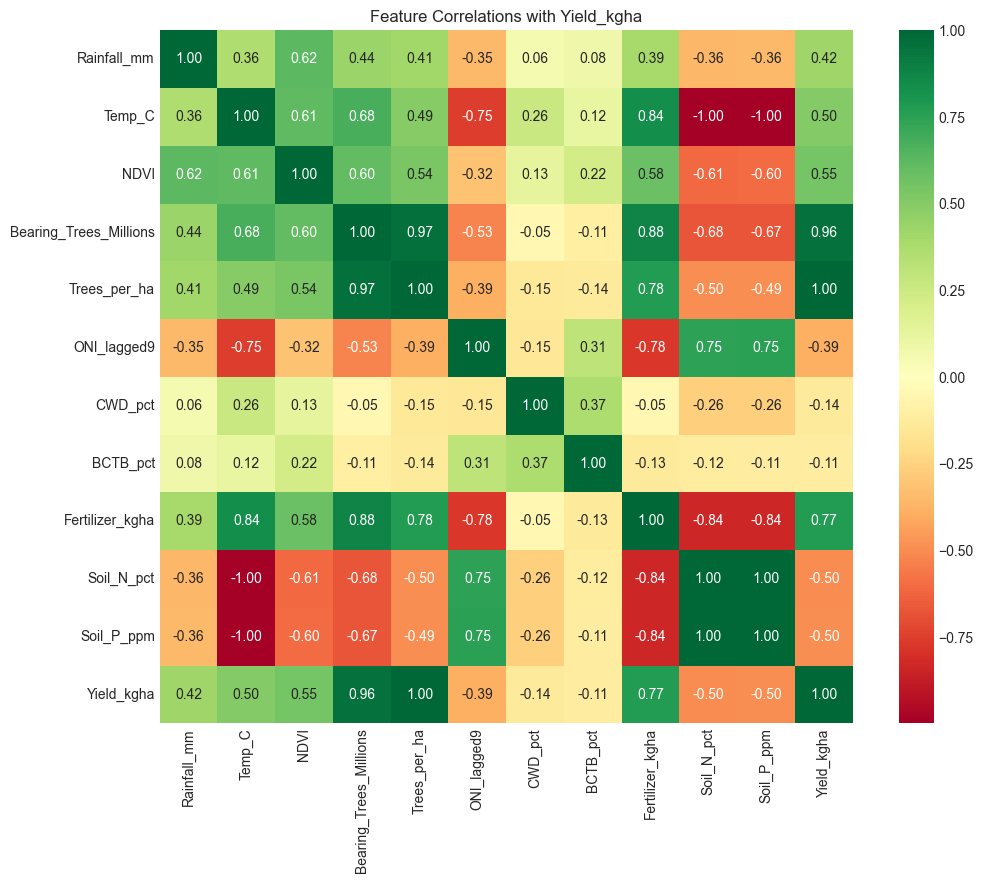

In [6]:
# 5. Exploratory Data Analysis (EDA)


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')

# Time series
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
df.plot(x='Year', y='Yield_kgha', ax=axes[0,0], title='Yield (kg/ha)', color='brown', linewidth=3)
df.plot(x='Year', y='CWD_pct', ax=axes[0,1], title='Coffee Wilt Disease (%)', color='red')
df.plot(x='Year', y='Fertilizer_kgha', ax=axes[1,0], title='Fertilizer Use (kg/ha)', color='green')
df.plot(x='Year', y='ONI_lagged9', ax=axes[1,1], title='ONI Lagged 9 Months', color='purple')
df.plot(x='Year', y='Soil_N_pct', ax=axes[2,0], title='Soil Nitrogen (%)', color='orange')
df.plot(x='Year', y='Bearing_Trees_Millions', ax=axes[2,1], title='Bearing Trees (Millions)', color='blue')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 9))
corr = df[features + ['Yield_kgha']].corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', center=0, square=True, fmt='.2f')
plt.title('Feature Correlations with Yield_kgha')
plt.show()

Through the diagrams, we can observe how different features contribute to the yield.